# Big Data Mart Sales Problem

Installing the important libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from warnings import filterwarnings
filterwarnings(action='ignore')

Load the data

In [2]:
test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
print("Train Data:",train.shape)
print("Test Data:",test.shape)

Train Data: (8523, 12)
Test Data: (5681, 11)


In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [10]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Ra

In [11]:
#finding categorical columns present in the dataset
train.select_dtypes(include=['object']).columns.tolist()

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
test.select_dtypes(include=['object']).columns.tolist()

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [13]:
train.isnull().sum()#.sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Now all the categorical values has been converted into numerical value.

# Concatenating the train and test dataset

In [15]:
train['Item']="Train"
test['Item']="Test"
bd= pd.concat([train,test],ignore_index=True)

In [16]:
bd.shape

(14204, 13)

In [17]:
bd.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


In [18]:
bd.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,Test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test


Data Preprocessing

In [19]:
bd.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
bd.info

<bound method DataFrame.info of       Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.000000   
4               NCD19         8.93          Low Fat         0.000000   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.000000   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092     

In [21]:
bd.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item                            0
dtype: int64

Exploratory Data Analysis

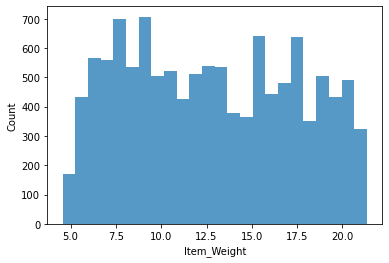

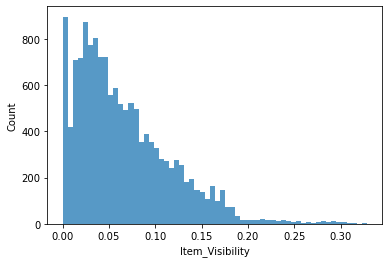

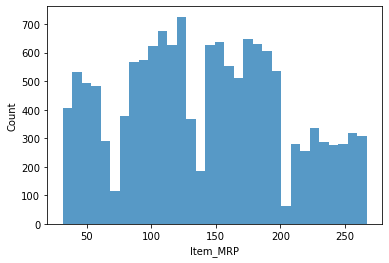

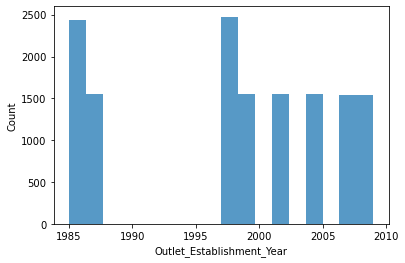

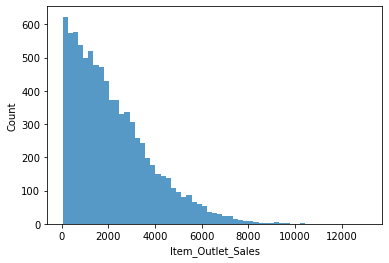

In [22]:
for i in bd.describe().columns:
    sns.histplot(bd[i].dropna(),linewidth=False)
    plt.show()

Categorical Variables analysis

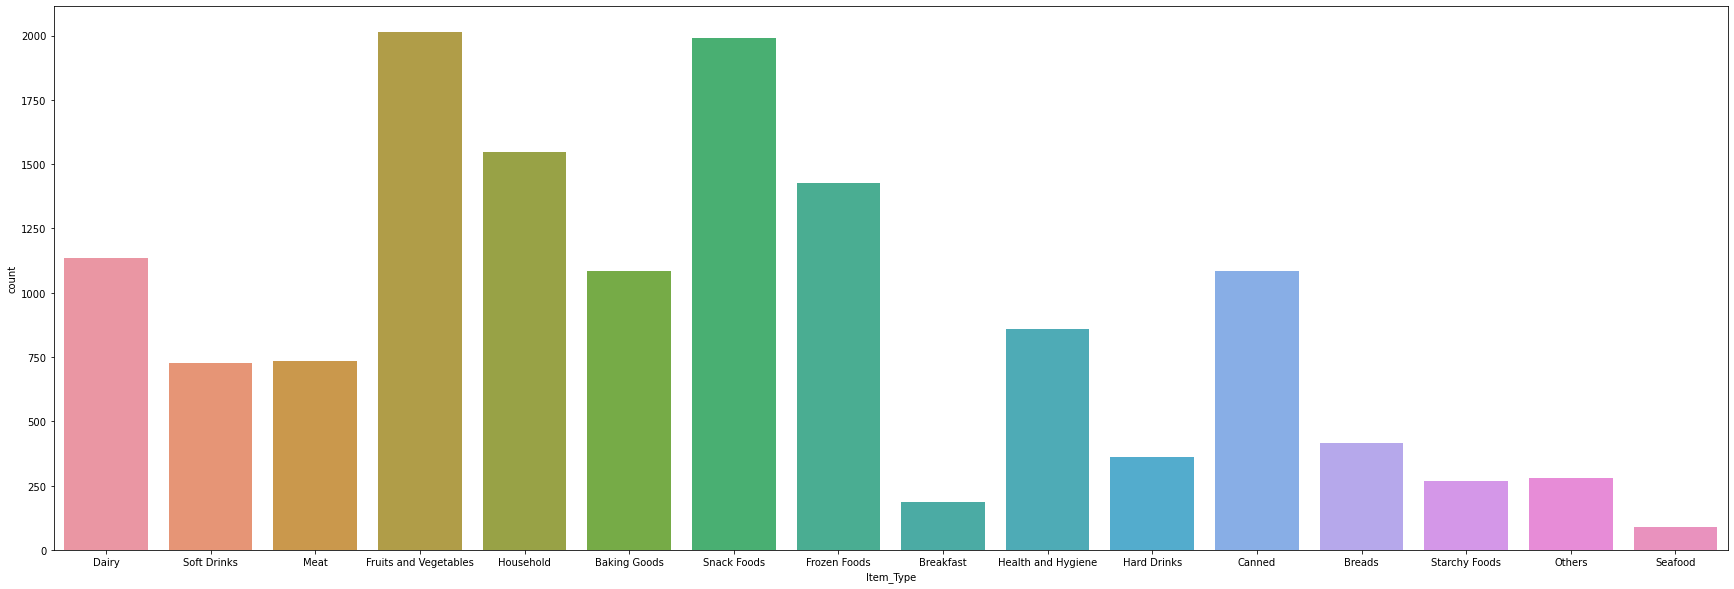

In [23]:
plt.figure(figsize=(30,10))
sns.countplot(bd.Item_Type)
plt.show()

In [24]:
bd.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [25]:
bd.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

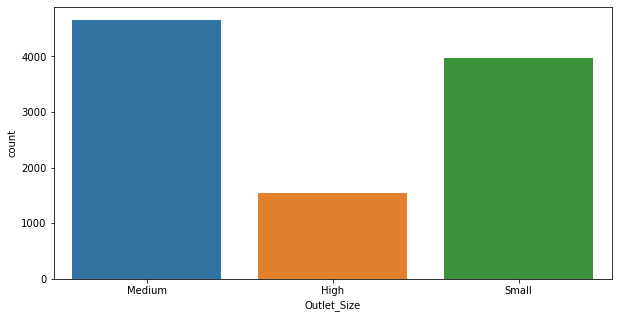

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(bd.Outlet_Size)
plt.show()

Now lets try have some visualization techniques

In [27]:
bd.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

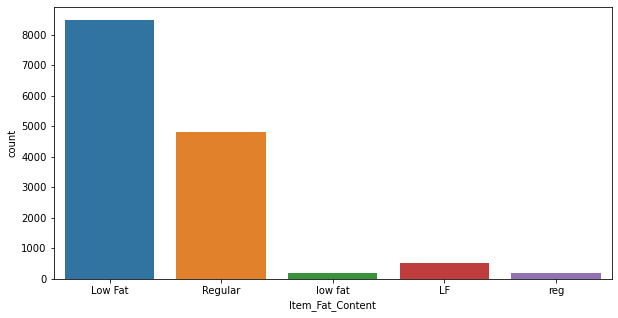

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(bd.Item_Fat_Content)
plt.show()

In [29]:
bd.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

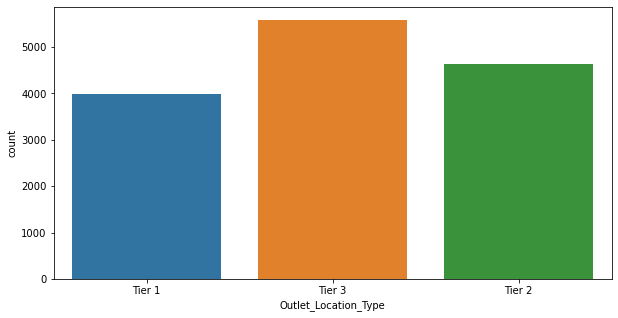

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(bd.Outlet_Location_Type)
plt.show()

In [31]:
bd.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

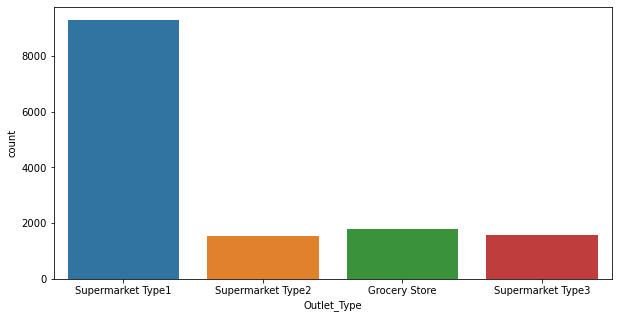

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(bd.Outlet_Type)
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
bd['Item_Type']=LE.fit_transform(bd['Item_Type'])
bd['Outlet_Size']=LE.fit_transform(bd['Outlet_Size'])
bd['Outlet_Type']=LE.fit_transform(bd['Outlet_Type'])
bd['Item_Fat_Content']=LE.fit_transform(bd['Item_Fat_Content'])
bd['Outlet_Location_Type']=LE.fit_transform(bd['Outlet_Location_Type'])
#bd['Item_Outlet_Sales ']=LE.fit_transform(bd['Item_Outlet_Sales '])

bd['Item_Type'].value_counts()
bd['Outlet_Size'].value_counts()
bd['Outlet_Type'].value_counts()
bd['Item_Fat_Content'].value_counts()
bd['Outlet_Location_Type'].value_counts()
#bd['Item_Outlet_Sales '].value_counts()


2    5583
1    4641
0    3980
Name: Outlet_Location_Type, dtype: int64

In [34]:
bd.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item
0,FDA15,9.30,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,Train
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,Train
2,FDN15,17.50,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,Train
3,FDX07,19.20,2,0.000000,6,182.0950,OUT010,1998,3,2,0,732.3800,Train
4,NCD19,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,Train


In [35]:
bd.shape

(14204, 13)

In [36]:
bd.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item'],
      dtype='object')

In [37]:
bd['Item_Weight'].fillna(bd['Item_Weight'].mode()[0], inplace=True)
bd['Outlet_Size'].fillna(bd['Outlet_Size'].mode()[0], inplace=True)
bd['Item_Outlet_Sales'].fillna(bd['Item_Outlet_Sales'].mode()[0], inplace=True)


In [38]:
bd.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item                         0
dtype: int64

In [39]:
bd.drop(['Item_Identifier','Outlet_Identifier'] ,axis=1, inplace=True)

In [40]:
bd.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380,Train
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228,Train
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700,Train
3,19.20,2,0.000000,6,182.0950,1998,3,2,0,732.3800,Train
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052,Train


# Exploratory Data Analysis

Correalation Matrix

In [41]:
bd.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.024524,0.027043,0.024853,0.030088,-0.274257,-0.069475,0.034569,0.162731,0.035435
Item_Fat_Content,-0.024524,1.000000,0.033864,-0.121140,-0.006195,-0.004135,-0.004608,-0.002518,-0.002380,0.007113
Item_Visibility,0.027043,0.033864,1.000000,-0.035646,-0.006351,-0.083678,0.089297,-0.017362,-0.165726,-0.089237
Item_Type,0.024853,-0.121140,-0.035646,1.000000,0.043948,0.003061,-0.001554,0.002083,0.004305,0.011695
Item_MRP,0.030088,-0.006195,-0.006351,0.043948,1.000000,0.000141,-0.000835,0.000838,0.000136,0.401572
Outlet_Establishment_Year,-0.274257,-0.004135,-0.083678,0.003061,0.000141,1.000000,0.470388,-0.089328,-0.122519,-0.034597
Outlet_Size,-0.069475,-0.004608,0.089297,-0.001554,-0.000835,0.470388,1.000000,-0.290188,-0.432092,-0.121691
Outlet_Location_Type,0.034569,-0.002518,-0.017362,0.002083,0.000838,-0.089328,-0.290188,1.000000,0.467251,0.063063
Outlet_Type,0.162731,-0.002380,-0.165726,0.004305,0.000136,-0.122519,-0.432092,0.467251,1.000000,0.283230
Item_Outlet_Sales,0.035435,0.007113,-0.089237,0.011695,0.401572,-0.034597,-0.121691,0.063063,0.283230,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

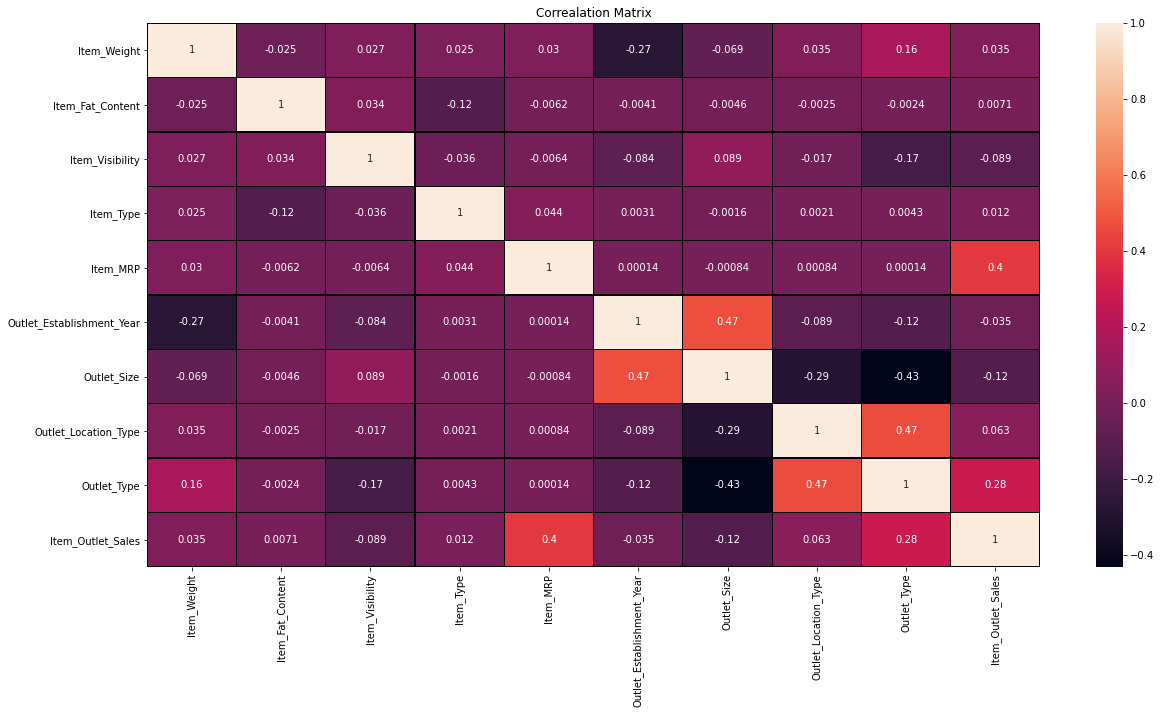

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(bd.corr(),annot=True,linecolor='Black',Linewidth=0.2)
plt.title('Correalation Matrix')
plt.show

In [52]:
X=bd.drop('Item', axis=1)
y=bd['Item']

In [53]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,3,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
14199,10.50,2,0.013496,13,141.3154,1997,2,0,1,958.7520
14200,7.60,2,0.142991,15,169.1448,2009,1,2,2,958.7520
14201,10.00,1,0.073529,8,118.7440,2002,3,1,1,958.7520
14202,15.30,2,0.000000,3,214.6218,2007,3,1,1,958.7520


In [54]:
y

0        0
1        0
2        0
3        0
4        0
        ..
14199    1
14200    1
14201    1
14202    1
14203    1
Name: Item, Length: 14204, dtype: int64

In [55]:
bd.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380,0
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228,0
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700,0
3,19.20,2,0.000000,6,182.0950,1998,3,2,0,732.3800,0
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052,0


In [56]:
bd.replace({"Item":{'Train':0,'Test':1}},inplace=True)
bd.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380,0
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228,0


In [57]:
#bd[bd.Item.str.contains('Train')]


In [58]:
#Now lets train the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=0)
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

X_train:         Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
3719        11.500                 2         0.020602          4   86.0540   
12702       13.150                 2         0.037946         13   89.1856   
2335        14.000                 2         0.060427          5  153.5656   
3749        18.250                 2         0.171174          4  156.4630   
5967        17.600                 1         0.073013         11   67.5142   
...            ...               ...              ...        ...       ...   
13123       20.100                 0         0.074743          4  111.5228   
3264        18.700                 1         0.104890          5  121.4072   
9845         7.750                 1         0.043306          0   95.3436   
10799        9.105                 1         0.038450          9   31.9900   
2732        14.000                 1         0.041355         15  182.0634   

       Outlet_Establishment_Year  Outlet_Size  Outlet

In [59]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
prediction = lg.predict(X_test)
acc_log = round(lg.score(X_train, y_train) * 100, 2)
acc_log

70.25

In [60]:
from sklearn.linear_model import LinearRegression
line=LinearRegression()
line.fit(X_train, y_train)
prediction=line.predict(X_test)
acc_1=round(line.score(X_train, y_train) *100,2)
acc_1


22.78

In [61]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
prediction = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [62]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
predictiom = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

99.69

In [64]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Linear Regression','Decision Tree','Random Forest','KNN'],
              
    'Score': [ acc_log, acc_1,
              acc_decision_tree,acc_random_forest,acc_knn,]})
models.sort_values(by='Score', ascending=True)

,Model,Score
1,Linear Regression,22.78
0,Logistic Regression,70.25
4,KNN,99.69
2,Decision Tree,100.00
3,Random Forest,100.00


In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, prediction)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, prediction)


In [66]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, prediction))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, prediction))

roc_auc_score for DecisionTree:  0.9977944508527643
roc_auc_score for Logistic Regression:  0.9977944508527643


In [67]:
import pickle
import joblib 

In [68]:
joblib.dump(roc_auc_score,'BigMart Data Sale.pkl')

['BigMart Data Sale.pkl']